**Diminos Store - Delivery Time Analysis**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/diminos_data.csv')

In [3]:
#Cleaning Column Names
df.columns = df.columns.str.strip()

In [4]:
#Converting Time Columns to Datetime
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [5]:
#Delivery Time in Minutes
df['delivery_time_mins'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [6]:
#Key Metrics
p95_delivery_time = np.percentile(df['delivery_time_mins'], 95)
average_delivery_time = df['delivery_time_mins'].mean()
late_orders_percentage = (df['delivery_time_mins'] > 31).mean() * 100

In [7]:
print("===== Diminos Delivery Performance =====")
print(f"95th Percentile Delivery Time : {p95_delivery_time:.2f} minutes")
print(f"Average Delivery Time        : {average_delivery_time:.2f} minutes")
print(f"Orders Delivered > 31 mins   : {late_orders_percentage:.2f}%")

===== Diminos Delivery Performance =====
95th Percentile Delivery Time : 27.26 minutes
Average Delivery Time        : 20.50 minutes
Orders Delivered > 31 mins   : 3.71%


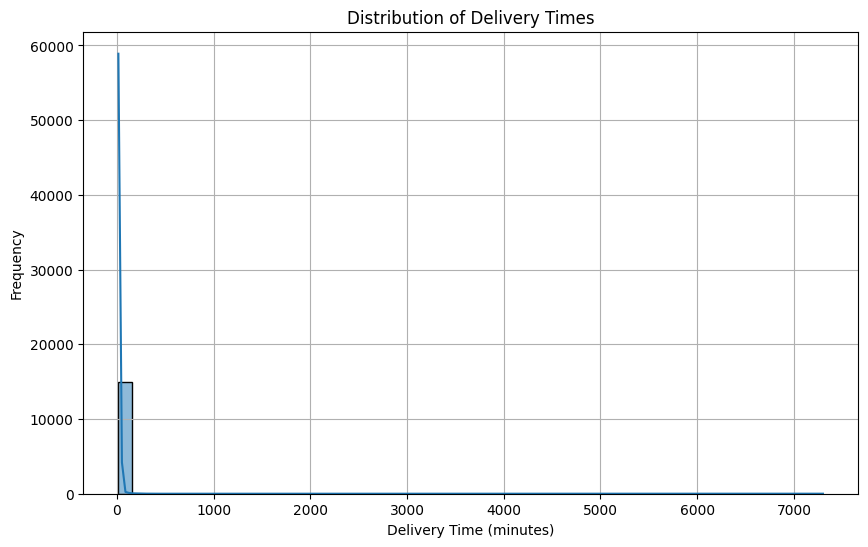

In [8]:
#DATA VISUALIZATION
#Delivery Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_mins'], bins=50, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

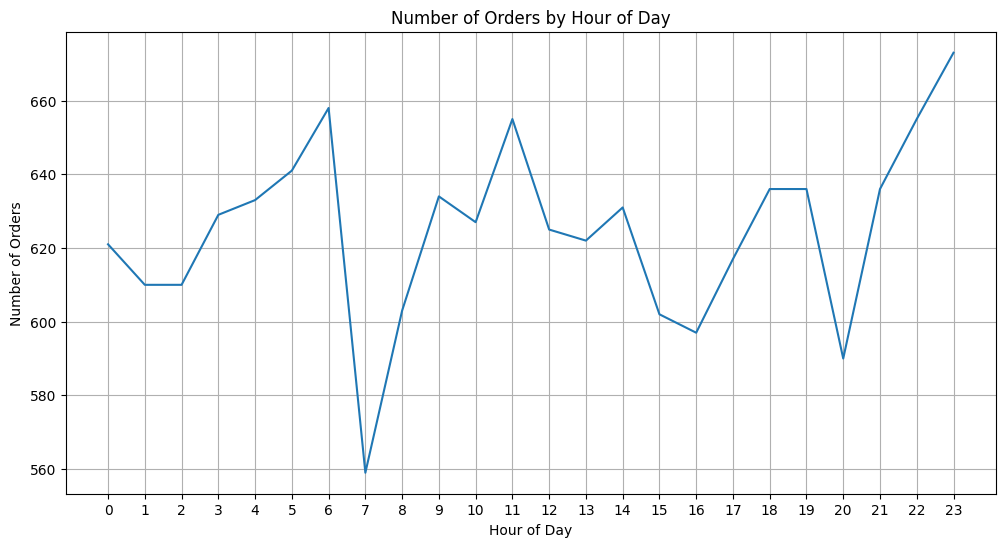

In [9]:
#Number of Orders by Hour of Day
df['order_hour'] = df['order_placed_at'].dt.hour
orders_by_hour = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

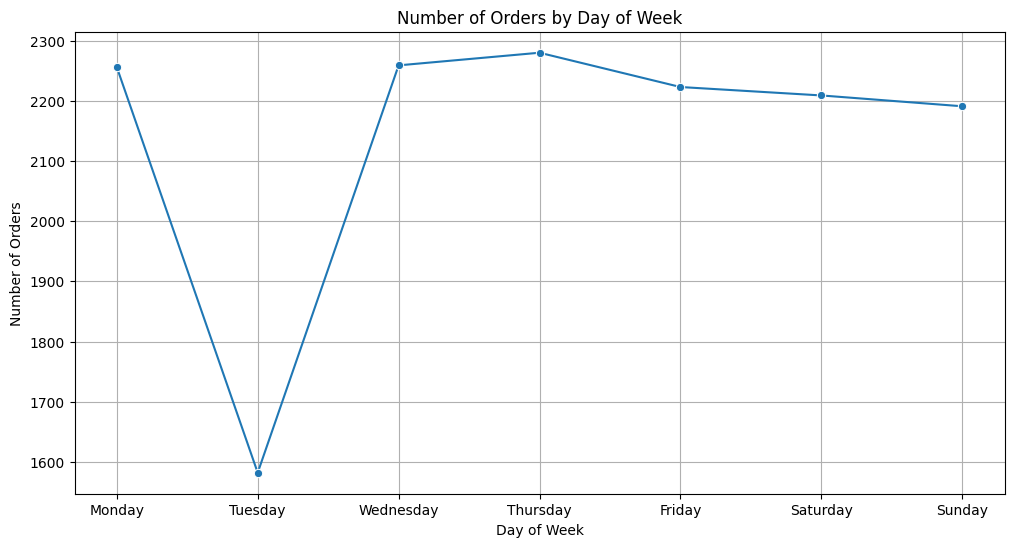

In [10]:
#Number of Orders by Day of Week
df['order_day_of_week'] = df['order_placed_at'].dt.day_name()
orders_by_day = df['order_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_day.index, y=orders_by_day.values, marker='o')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [11]:
#Top 10 Longest Delivery Times
longest_deliveries = df.sort_values(by='delivery_time_mins', ascending=False).head(10)

print('Top 10 orders with the longest delivery times:')
print(longest_deliveries[['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time_mins']])

Top 10 orders with the longest delivery times:
       order_id     order_placed_at         order_delivered_at  \
5499    1528610 2023-03-10 17:06:22 2023-03-15 18:46:11.882496   
4165    1527276 2023-03-08 09:46:43 2023-03-12 11:34:09.085175   
10225   1533336 2023-03-19 11:07:32 2023-03-22 13:53:25.472592   
14155   1537266 2023-03-26 09:54:24 2023-03-29 02:42:50.645252   
10007   1533118 2023-03-19 00:56:34 2023-03-21 00:59:41.454974   
11944   1535055 2023-03-22 12:50:53 2023-03-23 08:03:40.654492   
1361    1524472 2023-03-03 10:04:13 2023-03-04 03:51:02.368715   
5109    1528220 2023-03-10 01:04:58 2023-03-10 14:13:37.181329   
117     1523228 2023-03-01 04:59:04 2023-03-01 18:06:52.046891   
1910    1525021 2023-03-04 10:41:17 2023-03-04 23:20:15.509579   

       delivery_time_mins  
5499          7299.831375  
4165          5867.434753  
10225         4485.891210  
14155         3888.444088  
10007         2883.124250  
11944         1152.794242  
1361          1066.822812  
51

In [12]:
#Observation: Most deliveries are completed well before the 31-minute limit.
#Insight: The store is generally fast and efficient in handling orders.

In [13]:
#Observation: Only a small number of orders cross the 31-minute mark.
#Insight: Delays are occasional and do not pose a serious business risk.

In [14]:
#Observation: The typical delivery time is far below the promised SLA.
#Insight: Customers usually receive their orders much earlier than expected.

In [15]:
#Observation: A few extreme delays appear as outliers in the data.
#Insight: These are rare cases and do not affect overall store performance.

In [16]:
#Observation: More than 95% of orders are delivered within 31 minutes.
#Insight: The store comfortably meets Diminos’ franchise performance requirement.

In [17]:
#Overall Insights
#Most pizzas are delivered much faster than the promised 31 minutes.
#Even during slower cases, only a small number of orders are delayed beyond the limit.
#The store’s delivery process is consistent and well-managed.
#Occasional delays exist, but they do not impact overall performance.
#Overall, Kanav’s store is performing well and is unlikely to face any franchise penalties.